# 구별 주유소 밀집도에 따른 가격 경쟁 분석 (등고선)/ lmplot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')

In [4]:
first = pd.read_csv('./data/2020년 상반기 주유소 판매가격.csv',encoding = 'cp949')
first.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,기준 : 월간(202001~202006),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 01월,SK에너지,셀프,1802.00,1657.00,1495.00,0.0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 02월,SK에너지,셀프,1795.38,1637.97,1483.97,0.0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 03월,SK에너지,셀프,1741.26,1570.61,1431.13,0.0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 04월,SK에너지,셀프,1617.00,1425.33,1290.00,0.0


In [5]:
first.columns

Index(['번호', '지역', '상호', '주소', '기간', '상표', '셀프여부', '고급휘발유', '휘발유', '경유',
       '실내등유'],
      dtype='object')

In [6]:
first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2995 entries, 0 to 2994
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   번호      2995 non-null   object 
 1   지역      2994 non-null   object 
 2   상호      2994 non-null   object 
 3   주소      2994 non-null   object 
 4   기간      2994 non-null   object 
 5   상표      2994 non-null   object 
 6   셀프여부    2994 non-null   object 
 7   고급휘발유   2994 non-null   float64
 8   휘발유     2994 non-null   float64
 9   경유      2994 non-null   float64
 10  실내등유    2994 non-null   float64
dtypes: float64(4), object(7)
memory usage: 257.5+ KB


In [7]:
second = pd.read_csv('./data/2020년 하반기 주유소 판매가격.csv',encoding = 'cp949')
second.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,기준 : 월간(202007~202012),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 07월,SK에너지,셀프,1635.0,1435.0,1265.0,0.0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 08월,SK에너지,셀프,1635.0,1435.0,1265.0,0.0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 09월,SK에너지,셀프,1635.0,1435.0,1265.0,0.0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 10월,SK에너지,셀프,1635.0,1435.0,1265.0,0.0


In [8]:
second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2951 entries, 0 to 2950
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   번호      2951 non-null   object 
 1   지역      2950 non-null   object 
 2   상호      2950 non-null   object 
 3   주소      2950 non-null   object 
 4   기간      2950 non-null   object 
 5   상표      2950 non-null   object 
 6   셀프여부    2950 non-null   object 
 7   고급휘발유   2950 non-null   float64
 8   휘발유     2950 non-null   float64
 9   경유      2950 non-null   float64
 10  실내등유    2950 non-null   float64
dtypes: float64(4), object(7)
memory usage: 253.7+ KB


# 2. 데이터 결합

In [9]:
data = pd.concat([first,second], ignore_index=True)
data

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,기준 : 월간(202001~202006),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 01월,SK에너지,셀프,1802.00,1657.00,1495.00,0.0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 02월,SK에너지,셀프,1795.38,1637.97,1483.97,0.0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 03월,SK에너지,셀프,1741.26,1570.61,1431.13,0.0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 04월,SK에너지,셀프,1617.00,1425.33,1290.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5941,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 08월,현대오일뱅크,셀프,1598.00,1402.65,1211.10,0.0
5942,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 09월,현대오일뱅크,셀프,1598.00,1393.00,1203.00,0.0
5943,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 10월,현대오일뱅크,셀프,1598.00,1338.42,1148.42,0.0
5944,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 11월,현대오일뱅크,셀프,1598.00,1292.00,1092.37,0.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5946 entries, 0 to 5945
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   번호      5946 non-null   object 
 1   지역      5944 non-null   object 
 2   상호      5944 non-null   object 
 3   주소      5944 non-null   object 
 4   기간      5944 non-null   object 
 5   상표      5944 non-null   object 
 6   셀프여부    5944 non-null   object 
 7   고급휘발유   5944 non-null   float64
 8   휘발유     5944 non-null   float64
 9   경유      5944 non-null   float64
 10  실내등유    5944 non-null   float64
dtypes: float64(4), object(7)
memory usage: 511.1+ KB


In [11]:
data['구']=data.지역.str.split(' ').str[1]
data.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구
0,기준 : 월간(202001~202006),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 01월,SK에너지,셀프,1802.00,1657.00,1495.00,0.0,강남구
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 02월,SK에너지,셀프,1795.38,1637.97,1483.97,0.0,강남구
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 03월,SK에너지,셀프,1741.26,1570.61,1431.13,0.0,강남구
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 04월,SK에너지,셀프,1617.00,1425.33,1290.00,0.0,강남구


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5946 entries, 0 to 5945
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   번호      5946 non-null   object 
 1   지역      5944 non-null   object 
 2   상호      5944 non-null   object 
 3   주소      5944 non-null   object 
 4   기간      5944 non-null   object 
 5   상표      5944 non-null   object 
 6   셀프여부    5944 non-null   object 
 7   고급휘발유   5944 non-null   float64
 8   휘발유     5944 non-null   float64
 9   경유      5944 non-null   float64
 10  실내등유    5944 non-null   float64
 11  구       5944 non-null   object 
dtypes: float64(4), object(8)
memory usage: 557.6+ KB


In [23]:
data2=pd.DataFrame({'구':data['구'], '고급휘발유':data['고급휘발유'], '휘발유':data['휘발유'], 
                   '경유':data['경유'], '실내등유':data['실내등유'], '셀프여부':data['셀프여부'], '상표':data['상표']
            })
data2

,구,고급휘발유,휘발유,경유,실내등유,셀프여부,상표
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,강남구,1802.00,1657.00,1495.00,0.0,셀프,SK에너지
2,강남구,1795.38,1637.97,1483.97,0.0,셀프,SK에너지
3,강남구,1741.26,1570.61,1431.13,0.0,셀프,SK에너지
4,강남구,1617.00,1425.33,1290.00,0.0,셀프,SK에너지
...,...,...,...,...,...,...,...
5941,중랑구,1598.00,1402.65,1211.10,0.0,셀프,현대오일뱅크
5942,중랑구,1598.00,1393.00,1203.00,0.0,셀프,현대오일뱅크
5943,중랑구,1598.00,1338.42,1148.42,0.0,셀프,현대오일뱅크
5944,중랑구,1598.00,1292.00,1092.37,0.0,셀프,현대오일뱅크


In [20]:
data3 = data2.pivot_table(index=["구","셀프여부","상표"]).reset_index()
data3

,구,셀프여부,상표,경유,고급휘발유,실내등유,휘발유
0,강남구,셀프,GS칼텍스,1318.154571,1063.994857,343.032857,1479.628286
1,강남구,셀프,S-OIL,1267.051304,0.000000,641.594348,1459.241304
2,강남구,셀프,SK에너지,1274.469167,1231.329271,0.000000,1452.455417
3,강남구,셀프,현대오일뱅크,1214.515000,1589.122500,0.000000,1408.822500
4,강남구,일반,GS칼텍스,1475.091667,1838.877037,405.224537,1647.372500
...,...,...,...,...,...,...,...
184,중랑구,셀프,SK에너지,1202.506415,166.639434,724.314528,1389.504151
185,중랑구,셀프,현대오일뱅크,1165.591429,1605.645714,0.000000,1359.062857
186,중랑구,일반,GS칼텍스,1158.727500,0.000000,921.756667,1350.486667
187,중랑구,일반,S-OIL,1205.116667,0.000000,1068.718750,1394.353750


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

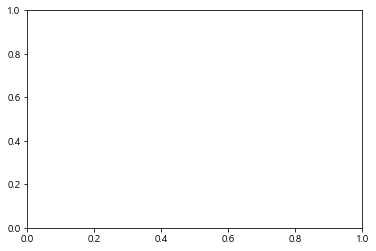

In [21]:
# kdeplot 시도 하려고 했던거 
sns.kdeplot(
    data=data3, x="구", y="휘발유",
    levels=5, thresh=.2,
)

In [27]:
data2.shape

(5946, 7)

In [28]:
data2.describe()

,고급휘발유,휘발유,경유,실내등유
count,5944.000000,5944.000000,5944.000000,5944.000000
mean,781.251334,1470.605846,1286.655999,445.978969
std,891.533670,191.148052,200.559959,545.931753
min,0.000000,1175.030000,0.000000,0.000000
25%,0.000000,1349.000000,1155.000000,0.000000
50%,0.000000,1403.175000,1215.420000,0.000000
75%,1648.082500,1548.405000,1380.152500,1050.000000
max,2663.390000,2320.550000,2167.130000,1634.290000


In [30]:
data2[data2["dataset"]=="강남구"].describe()

KeyError: 'dataset'

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

<Figure size 2160x1440 with 0 Axes>

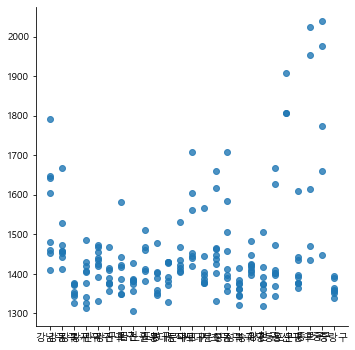

In [25]:
# lmplot 시도 하려고 했던거 
plt.figure(figsize=(30,20))
sns.lmplot(x='구',y = "휘발유",data=data3)
plt.show()

In [22]:
data = sns.구("data")

AttributeError: module 'seaborn' has no attribute '구'

In [27]:
data2.to_csv("C:/Users/Playdata/Desktop/data.csv",index=False, encoding="cp949")